In [1]:
# IMPORTING NECESSARY LIBRARIES

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
# READING DATA AND CHECKING DATA

data = pd.read_csv("/kaggle/input/playground-series-s3e17/train.csv")
data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
# DOING SOME INITIAL PREPROCESSING ON THE DATA

def initial_process(data):
    
    data = data.sample(frac=1)
    data = data.drop(['id','Product ID'], axis = 1)
    data = data.drop_duplicates()
    data.columns = data.columns.str.replace('[\[\]]', '', regex=True)
    
    return data
    
data = initial_process(data)

data.head()

,Type,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min,Machine failure,TWF,HDF,PWF,OSF,RNF
48836,L,300.5,311.6,1646,30.4,158,0,0,0,0,0,0
18675,H,300.0,309.6,1832,23.0,92,0,0,0,0,0,0
173,L,297.0,307.7,1731,28.5,100,0,0,0,0,0,0
35049,L,298.8,309.1,1597,31.2,171,0,0,0,0,0,0
80389,H,300.4,310.5,1436,49.4,96,0,0,0,0,0,0


In [4]:
# CREATING TO FUNCTION TO EXPLORE DATA

def explore(data):
    
    print("Shape of data is:", data.shape,"\n")
    
    print("Further describing the data:")
    desc = pd.DataFrame(index = list(data))
    desc['count'] = data.count()
    desc['null'] = data.isnull().sum()
    desc['type'] = data.dtypes
    
    desc = pd.concat([desc, data.describe().T.drop('count', axis = 1)], axis = 1)
    
    return desc
    
explore(data)

Shape of data is: (135273, 12) 

Further describing the data:


,count,null,type,mean,std,min,25%,50%,75%,max
Type,135273,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air temperature K,135273,0,float64,299.863235,1.862659,295.3,298.3,300.0,301.2,304.4
Process temperature K,135273,0,float64,309.941195,1.384932,305.8,308.8,310.0,310.9,313.8
Rotational speed rpm,135273,0,int64,1520.343151,138.651099,1181.0,1432.0,1493.0,1580.0,2886.0
Torque Nm,135273,0,float64,40.341781,8.493127,3.8,34.6,40.4,46.1,76.6
Tool wear min,135273,0,int64,104.358386,63.946150,0.0,48.0,106.0,159.0,253.0
Machine failure,135273,0,int64,0.015739,0.124463,0.0,0.0,0.0,0.0,1.0
TWF,135273,0,int64,0.001538,0.039183,0.0,0.0,0.0,0.0,1.0
HDF,135273,0,int64,0.005182,0.071800,0.0,0.0,0.0,0.0,1.0
PWF,135273,0,int64,0.002366,0.048580,0.0,0.0,0.0,0.0,1.0


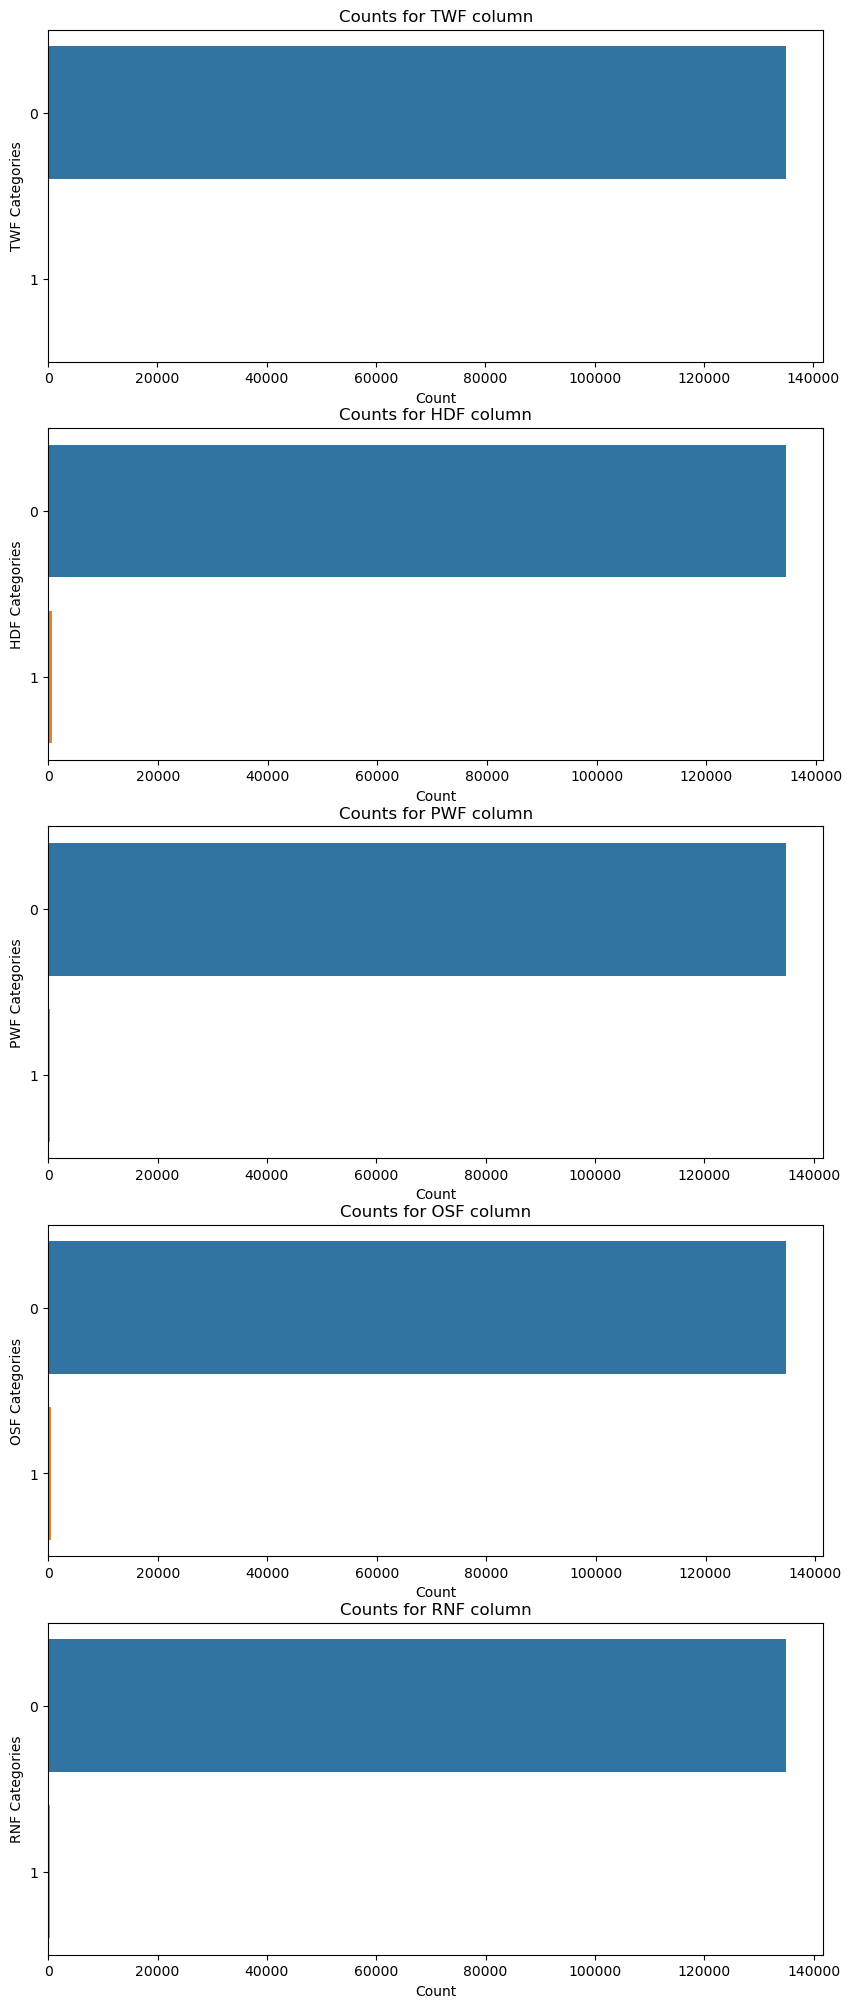

In [5]:
# CHECKING DISTRIBUTION OF SOME CATEGORICAL COLUMNS WHICH SEEM TO BE PREDOMINANTLY ONE CLASS

fig, ax = plt.subplots(5,1, figsize = (10,25))

def frequency(data, columns):
    for i, column in enumerate(columns):
        sns.countplot(data = data, y = column, ax = ax[i], order = data[column].value_counts().index)
        ax[i].set_xlabel('Count', fontsize = 10)
        ax[i].set_ylabel(f"{column} Categories")
        ax[i].set_title(f"Counts for {column} column")
 

cols = ['TWF','HDF','PWF','OSF','RNF']
frequency(data, cols)

In [6]:
# DROPPING SOME COLUMNS AS MOST VALUES IN THOSE COLUMNS ARE PREDOMINANTLY ONE CLASS

data = data.drop(['TWF','HDF','PWF','OSF','RNF'], axis = 1)
data.head()

,Type,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min,Machine failure
48836,L,300.5,311.6,1646,30.4,158,0
18675,H,300.0,309.6,1832,23.0,92,0
173,L,297.0,307.7,1731,28.5,100,0
35049,L,298.8,309.1,1597,31.2,171,0
80389,H,300.4,310.5,1436,49.4,96,0


In [7]:
# DESCRIBING LEFT OVER DATA

explore(data)

Shape of data is: (135273, 7) 

Further describing the data:


,count,null,type,mean,std,min,25%,50%,75%,max
Type,135273,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air temperature K,135273,0,float64,299.863235,1.862659,295.3,298.3,300.0,301.2,304.4
Process temperature K,135273,0,float64,309.941195,1.384932,305.8,308.8,310.0,310.9,313.8
Rotational speed rpm,135273,0,int64,1520.343151,138.651099,1181.0,1432.0,1493.0,1580.0,2886.0
Torque Nm,135273,0,float64,40.341781,8.493127,3.8,34.6,40.4,46.1,76.6
Tool wear min,135273,0,int64,104.358386,63.946150,0.0,48.0,106.0,159.0,253.0
Machine failure,135273,0,int64,0.015739,0.124463,0.0,0.0,0.0,0.0,1.0


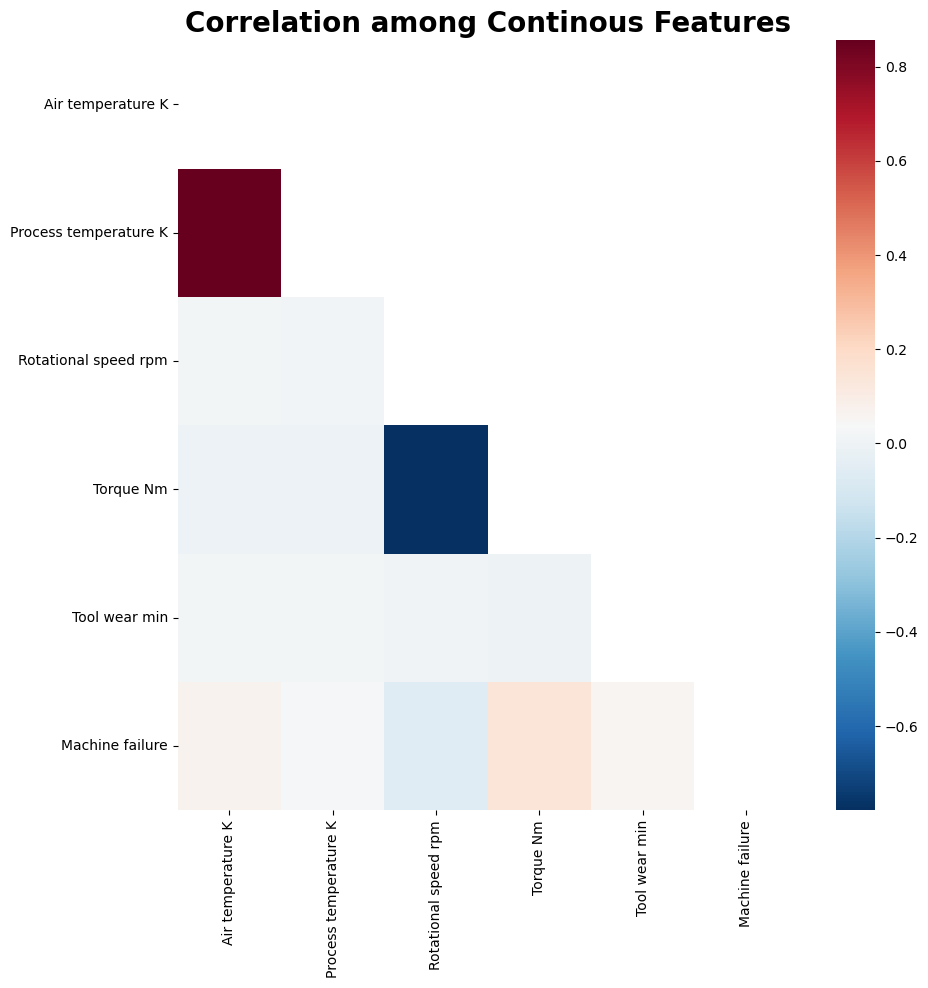

In [8]:
# CHECKING CORRELATIONS AMONG THE CONTINOUS VARIABLES COLUMNS

def plot_heatmap(data, title):
    
    mask = np.triu(np.ones_like(data.astype(float).corr()))
    colormap = plt.cm.RdBu_r
    plt.figure(figsize = (10,10))
    plt.title(f"{title}", size = 20, fontweight = 'bold')
    
    sns.heatmap(data.astype(float).corr(), cmap = colormap, mask = mask)
    plt.show()
    
plot_heatmap(data.drop("Type",axis = 1), "Correlation among Continous Features")

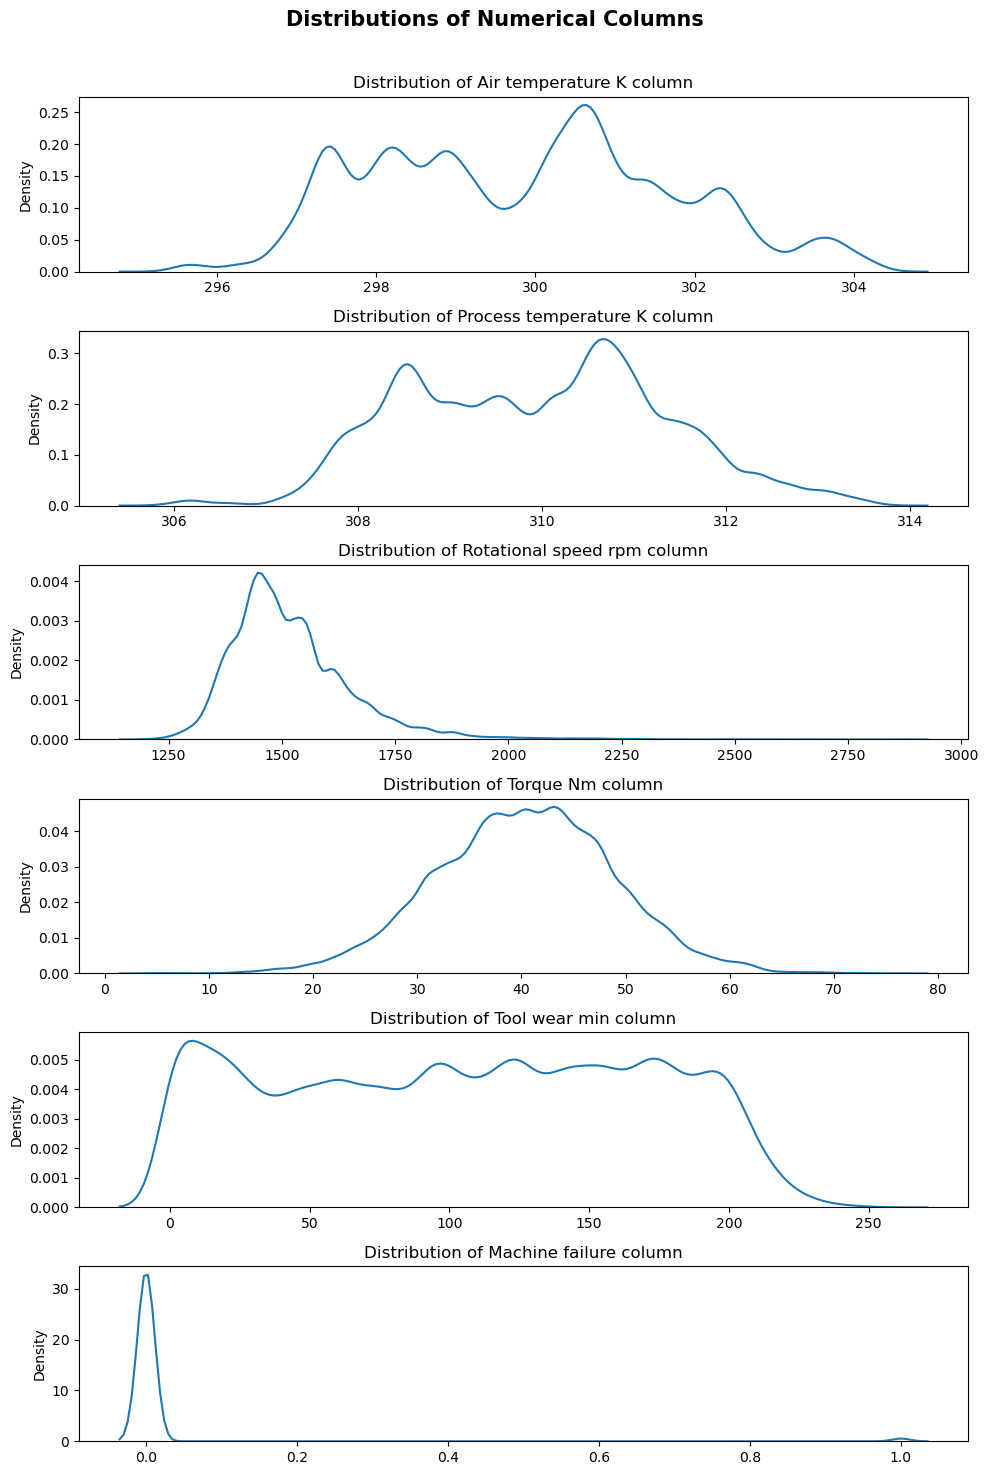

In [9]:
# PLOTTING DISTRIBUTIONS OF CONTINOUS VARIABLES 

fig, ax = plt.subplots(6, 1, figsize = (10,15))

def plot_distr(data, columns):
    
    for i, column in enumerate(columns):
        sns.kdeplot(data[column], ax = ax[i])
        ax[i].set_title(f"Distribution of {column} column")
        ax[i].set_xlabel(None)

fig.suptitle('Distributions of Numerical Columns\n\n', fontsize = 15, fontweight = 'bold')
plot_distr(data, data.drop('Type', axis = 1).columns)
plt.tight_layout()

Text(0.5, 1.0, 'Pie Chart representing classes within Type Column')

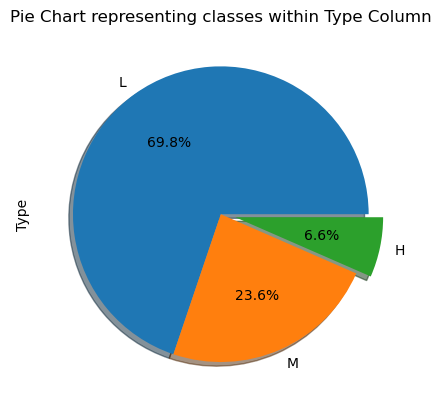

In [10]:
# PLOTTING A PIE CHART FOR THE CATEGORICAL VARIABLE

data['Type'].value_counts().plot(kind='pie',autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0)
plt.title("Pie Chart representing classes within Type Column")

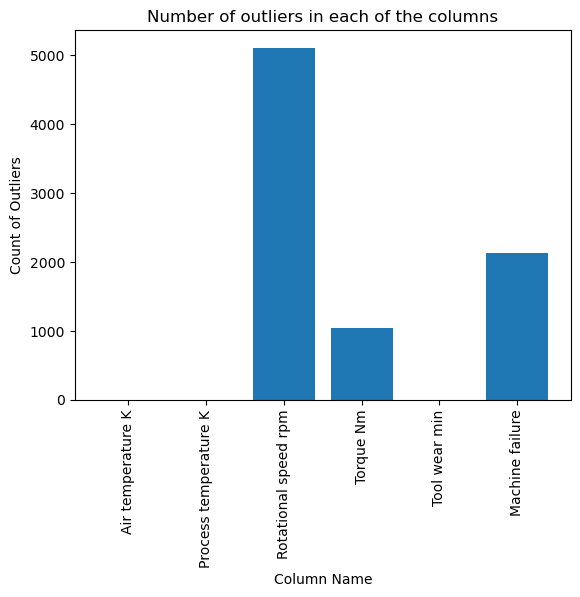

In [11]:
# CALCULATING NUMBER OF OUTLIERS IN EACH OF THE COLUMNS

def calc_outliers(data):

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    count_outl = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
    x = data.columns
    plt.xticks(rotation='vertical')
    plt.xlabel("Column Name")
    plt.ylabel("Count of Outliers")
    plt.title("Number of outliers in each of the columns")
    
    plt.bar(x, count_outl)

calc_outliers(data.drop("Type", axis = 1))

In [12]:
# WE DO NOT REMOVE OUTLIERS BUT REPLACE THEM WITH MEDIAN OF THE COLUMN
 
def replace_outliers_with_median(column_name, data):
    
    column = data[column_name]
    q1, q3 = np.percentile(column, [25, 75])
    iqr = q3 - q1
    
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    outliers = (column < lower_bound) | (column > upper_bound)
    median = np.median(column[~outliers])
    data[column_name][outliers] = median
    
replace_outliers_with_median('Rotational speed rpm', data)
replace_outliers_with_median('Torque Nm', data)

data.head()

,Type,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min,Machine failure
48836,L,300.5,311.6,1646,30.4,158,0
18675,H,300.0,309.6,1488,23.0,92,0
173,L,297.0,307.7,1731,28.5,100,0
35049,L,298.8,309.1,1597,31.2,171,0
80389,H,300.4,310.5,1436,49.4,96,0


Text(0.5, 1.0, 'No. of Samples in each Class of Target Variable')

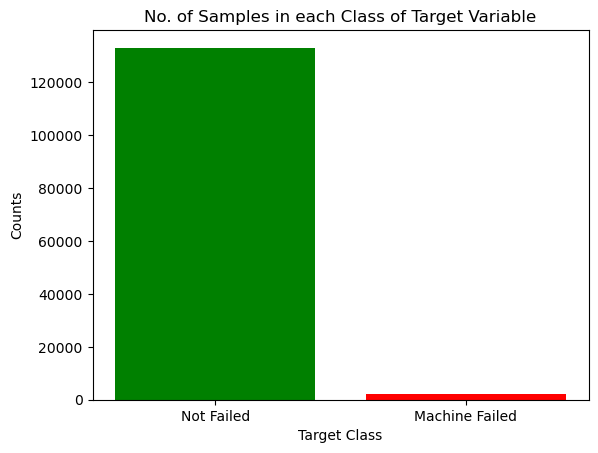

In [13]:
# CHECKING HOW THE TARGET VARIABLE IS DISTRIBUTED

x = ["Not Failed", "Machine Failed"]
plt.bar(x , height = data["Machine failure"].value_counts(), color = ['green', 'red'])

plt.xlabel("Target Class")
plt.ylabel("Counts")
plt.title("No. of Samples in each Class of Target Variable")

In [14]:
# SPLITTING DATA INTO X AND Y

x = data.drop("Machine failure", axis = 1)
y = data["Machine failure"]

In [15]:
# SCALING CONTINOUS VARS. AND ENCODING CATEGORICAL

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 

scaler = StandardScaler()
le = LabelEncoder()

for i in x.columns:
    if i=="Type":
        x[i] = le.fit_transform(x['Type'])
    else:
        x[i] = scaler.fit_transform(x[i].values.reshape(-1,1))

x.head()

,Type,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min
48836,1,0.341860,1.197756,1.381784,-1.219919,0.838859
18675,0,0.073425,-0.246363,-0.144604,-2.125143,-0.193263
173,1,-1.537182,-1.618277,2.202942,-1.452341,-0.068157
35049,1,-0.570818,-0.607393,0.908411,-1.122057,1.042156
80389,0,0.288173,0.403491,-0.646959,1.104306,-0.130710


**FEATURE ENGINEERING AND SELECTION**

In [16]:
# FEATURE ENGINEERING SOME POLYNOMIAL FEATURES 

x["Air temperature K_2"] = x["Air temperature K"]**2
x["Process temperature K_2"] = x["Process temperature K"]**2
x["Rotational speed rpm_2"] = x["Rotational speed rpm"]**2
x["Torque Nm"] = x["Torque Nm"]**2

print("\n Creating some Polynomial Features......\n")


 Creating some Polynomial Features......



In [17]:
# FEATURE ENGINEERING SOME MORE INTERACTIVE FEATURES

x["Power"] = x["Torque Nm"] * x["Rotational speed rpm"]
x["temp_ratio"] = x["Process temperature K"] / x["Air temperature K"]
x["tool_wear_speed"] = x["Tool wear min"] * x["Rotational speed rpm"]

print("\nCreating some Interation Features....\n")


Creating some Interation Features....



In [18]:
# CHECKING DATA AFTER FEATURE ENGINEERING

x.head()

,Type,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min,Air temperature K_2,Process temperature K_2,Rotational speed rpm_2,Power,temp_ratio,tool_wear_speed
48836,1,0.341860,1.197756,1.381784,1.488202,0.838859,0.116868,1.434621,1.909327,2.056374,3.503650,1.159122
18675,0,0.073425,-0.246363,-0.144604,4.516235,-0.193263,0.005391,0.060695,0.020910,-0.653064,-3.355302,0.027947
173,1,-1.537182,-1.618277,2.202942,2.109296,-0.068157,2.362928,2.618821,4.852952,4.646656,1.052756,-0.150147
35049,1,-0.570818,-0.607393,0.908411,1.259012,1.042156,0.325833,0.368927,0.825210,1.143699,1.064076,0.946705
80389,0,0.288173,0.403491,-0.646959,1.219492,-0.130710,0.083044,0.162805,0.418556,-0.788961,1.400169,0.084564


In [19]:
# SELECTING BEST FEATURES BASED ON A COMBINBATION OF RIDGE REGRESSION AND SELECTKBEST

from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectKBest, f_regression
from collections import Counter
from operator import itemgetter

def select_best_features(data):
    
    # SELECTING BEST BASED ON RIDGE REGRESSION
    rg = Ridge()
    rg.fit(x, y)
    rg_feats = {}
    for i in range(len(x.columns)):
        rg_feats[x.columns[i]] = rg.coef_[i]
        
    # SELECTING BEST BASED ON P VALUE SCORES (SELECTKBEST)
    kbest = SelectKBest(score_func = f_regression, k = 10)
    kbest.fit(x,y)
    kbest_feats = {}
    for i in kbest.get_support(indices = True):
        kbest_feats[x.columns[i]] = kbest.scores_[i]
    
    # COMBINING FEATURES FROM THE 2 ALGOS.
    combined = {}
    for i in [rg_feats, kbest_feats]:
        for a,b in i.items():
            if a in combined:
                combined[a] += b
            else:
                combined[a] = b
    
    top_8 = []
    for feature, score in sorted(combined.items(), key = lambda x: x[1], reverse = True)[:8]:
        top_8.append(feature)
    
    return top_8

new_feats = select_best_features(x)
new_feats

['Power',
 'Rotational speed rpm',
 'Torque Nm',
 'Rotational speed rpm_2',
 'Air temperature K',
 'Tool wear min',
 'Air temperature K_2',
 'tool_wear_speed']

In [20]:
# KEEPING ONLY THE BEST FEATURES IN X BASED ON THE PREVIOUS ALGORITHMS

x = x[new_feats]
x.head()

,Power,Rotational speed rpm,Torque Nm,Rotational speed rpm_2,Air temperature K,Tool wear min,Air temperature K_2,tool_wear_speed
48836,2.056374,1.381784,1.488202,1.909327,0.341860,0.838859,0.116868,1.159122
18675,-0.653064,-0.144604,4.516235,0.020910,0.073425,-0.193263,0.005391,0.027947
173,4.646656,2.202942,2.109296,4.852952,-1.537182,-0.068157,2.362928,-0.150147
35049,1.143699,0.908411,1.259012,0.825210,-0.570818,1.042156,0.325833,0.946705
80389,-0.788961,-0.646959,1.219492,0.418556,0.288173,-0.130710,0.083044,0.084564


**MODEL FITTING AND EVALUATION**

In [21]:
# SPLITTING UP THE DATA INTO TRAIN AND TEST DATA

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

print("Shape of Training data is as follows:",x_train.shape)
print("Shape of Testing Data is as follows:", x_test.shape)

Shape of Training data is as follows: (108218, 8)
Shape of Testing Data is as follows: (27055, 8)


In [22]:
# IMPORTING GRIDSEARCHCV FOR HYPERPARAMETER TUNING

from sklearn.model_selection import GridSearchCV
from time import time

In [23]:
# INSTALLING XGBOOST PACKAGE

%pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [24]:
# CHECKING INCASE THERE ARE NULL IN TARGET VARIABLE

y.isna().sum()

0

In [25]:
# GETTING BEST PARAMETERS FOR THE 3 MODELS BASED ON GRIDSEARCHCV

par_time = time()

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

def get_best_params(model, params):
    
    gs_cv = GridSearchCV(estimator = model, param_grid = params, cv = 2)
    gs_cv.fit(x_train, y_train)
    
    print(f"Best Parameter for {model} model are:", gs_cv.best_params_,"\n")
    
    
rf = RandomForestClassifier()
rf_grid = { 
    'n_estimators': [50,75,100],
    'max_features': ['sqrt', 'log2']
        }

xg = XGBClassifier()
xg_grid = {'max_depth':[3,5],
           'n_estimators':[20,50,75]
        }

adb = AdaBoostClassifier()
adb_grid = {'n_estimators': [50, 100, 150]}


get_best_params(rf, rf_grid)
get_best_params(xg, xg_grid)
get_best_params(adb, adb_grid)

print("\n Time taken to find best parameters for the 3 models: ",round(time()-par_time, 3), "seconds",'\n')

Best Parameter for RandomForestClassifier() model are: {'max_features': 'sqrt', 'n_estimators': 100} 

Best Parameter for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) model are: {'max_depth': 3, 'n_estimators': 20} 

Best Parameter for AdaBoostClassifier() model are: {'n_estimators': 50} 


 

In [26]:
# CREATING INSTANCES FOR 3 MODELS WITH BEST PARAMETERS 

rf_best = RandomForestClassifier(max_features='sqrt', n_estimators= 100)
xg_best = XGBClassifier(max_depth= 3, n_estimators=75)
ada_best = AdaBoostClassifier(n_estimators= 100)

In [27]:
# FITTING A VOTING CLASSIFIER TO MAKE A MAJORITY VOTE BASED ON THE 3 MODELS 

vot_time = time()

from sklearn.ensemble import VotingClassifier

classifiers = [('Random Forest', rf_best), 
               ('XGBoost', xg_best), 
               ('AdaBoost', ada_best)]

voted_clf = VotingClassifier(estimators=classifiers, voting='hard')

voted_clf.fit(x_train, y_train)

print("\n Time taken to fit out Voting Classifier Model:",round(time()-vot_time, 3), "seconds",'\n')


 Time taken to fit out Voting Classifier Model: 40.898 seconds 



In [28]:
# MAKING PREDICTIONS WITH VOTING CLASSFIER

voted_preds = voted_clf.predict(x_test)

In [29]:
# CREATING A FUNCTION TO EVALUATE THE MODELS, WHICH PRINTS ACCURACY_SCORE, CONFUSION MATRIX AND CLASSIFICATION REPORT INCLUDING PRECISION, RECALL ETC.

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate_model(model_name, y_test, y_pred):
    
    print(f"Accuracy of {model_name} is: {accuracy_score(y_test, y_pred)}","\n")

    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap=plt.cm.Blues)
    ax.set_xticks(np.arange(len(np.unique(y_test))))
    ax.set_yticks(np.arange(len(np.unique(y_test))))
    ax.set_xticklabels(np.unique(y_test))
    ax.set_yticklabels(np.unique(y_test))
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title(f"Confusion matrix of {model_name}")
    for i in range(len(np.unique(y_test))):
        for j in range(len(np.unique(y_test))):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="white")
    plt.show()
    
    print(f"Classification report of {model_name}:","\n")
    print(classification_report(y_test, y_pred), "\n")
    print("\n")
    

Accuracy of Voting Classifier is: 0.9863611162446867 



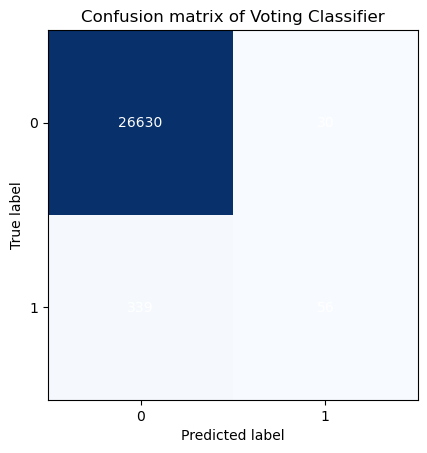

Classification report of Voting Classifier: 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     26660
           1       0.65      0.14      0.23       395

    accuracy                           0.99     27055
   macro avg       0.82      0.57      0.61     27055
weighted avg       0.98      0.99      0.98     27055
 





In [30]:
# EVALUATING VOTING CLASSIFER MODEL

evaluate_model("Voting Classifier", y_test, voted_preds)
